# Modelo de linguagem natural MindShield, para detecção de instabilidade emocional.

# 1.0 Instalação

## 1.1 Importação de bibliotecas

In [1]:
# instalando bibliotecas para o embading de texto
!pip install unidecode
import locale
locale.getpreferredencoding = lambda: 'UTF-8'
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=3f0ebb8c4d2ba6f9146dd50b29590b3d98d0c3c8901591919edf123469c68f95
  Stored in directory:

In [99]:
#importação de bibliotecas
#pandas para visualização dos dados
import pandas as pd
#unidecode para o tratamento dos dados
from unidecode import unidecode
#importação das bibliotecas para remoção de Stop Words
import spacy
nlp = spacy.cli.download('pt_core_news_sm')
nlp = spacy.load('pt_core_news_sm')
#nltk para pre proscesamento e tokenização
import nltk
nltk.download('punkt')
#biblioteca para tokenização 
from keras.preprocessing.text import Tokenizer
#bibliotecas para o modelo de naive bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
#bibliotecas para a avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#biblioteca para exportação dos modelos
import pickle
#importação de bibliotecas para matematica
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

#bibliotecas para rede neural
import keras
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from sentence_transformers import SentenceTransformer
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
#bibliotecas para exportação de rede neural
from joblib import dump
from joblib import load
#bibliotecas para vetorização
from sentence_transformers import SentenceTransformer
from transformers import BertForSequenceClassification

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.2 Criação do dataframe

Para o treinamento do modelo foram utilizados os sentimentos extraidos de avaliação de filmes

Abaixo foram importados e plotados os dados para uma visualização inicial

In [4]:
#importando data frame
df = pd.read_csv("/content/drive/MyDrive/Hackas/imdb-reviews-pt-br.csv")

In [5]:
df

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [6]:
# reduzindo a base de dados com 8000 negativos 8000 positivos
df_head = df.head(5000)

# Seleciona as últimas 2500 linhas
df_tail = df.tail(5000)

# Concatena as duas partes
df = pd.concat([df_head, df_tail])

In [7]:
df['sentiment'].value_counts()

neg    5000
pos    5000
Name: sentiment, dtype: int64

## 1.3 Remoção de dados que não serão utilizados

Removendo comentarios em ingles

In [8]:
# removendo colunas em ingles
df = df.drop('text_en', axis=1)

Removendo a coluna de id

In [9]:
df = df.drop('id', axis=1)

Abaixo e possivel ver o codigo após a filtragem dos dados que serão utilizados

In [10]:
df

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...
49454,"Como a média de votos era muito baixa, e o fat...",pos
49455,O enredo teve algumas reviravoltas infelizes e...,pos
49456,Estou espantado com a forma como este filme e ...,pos
49457,A Christmas Together realmente veio antes do m...,pos


# 2.0 Pré processamento dos dados

O pré processamento dos dados pretende eliminar informações desnecessárias, corrigir erros ortograficos e padronizar o formato dos dados. Este proscesso e importante para evitar que dados desestruturados ou fora do padrão prejudiquem a o desempenho do modelo.

## 2.1 Remoção dos acentos

Definição de função

In [11]:
# função para remoção de acentos
def remocaoAcentos(dados):
    dados = dados.applymap(lambda x: unidecode(str(x)))
    return dados

Teste

In [12]:
#chamando a função para remover acentos
remocaoAcentos(df.head(100))

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este e um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever musicas ...,neg
4,Filmes de fotos de latao nao e uma palavra apr...,neg
...,...,...
95,Tyra Banks precisa ensinar a essas meninas que...,neg
96,"Este e de longe o show mais insipido, idiota e...",neg
97,"Foi horrivel, simples e simples. Qual foi a me...",neg
98,Uau! Eu acho que eles fizeram esse filme para ...,neg


## 2.2 Tratamento de letras maiusculas

Definição de função

In [13]:
#função para tratar letra maiusculas
def maiusculas(dados):
    # Pré-processamento das letras maiúsculas
    dados = dados.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    # Exibição dos dados pré-processados
    return dados

Teste

In [14]:
#removendo letras maiusculas
maiusculas(df.head(1000))

,text_pt,sentiment
0,"mais uma vez, o sr. costner arrumou um filme p...",neg
1,este é um exemplo do motivo pelo qual a maiori...,neg
2,"primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,nem mesmo os beatles puderam escrever músicas ...,neg
4,filmes de fotos de latão não é uma palavra apr...,neg
...,...,...
995,nós demos a este filme uma estrela por péssima...,neg
996,todo filme eu tenho ppvd porque leonard maltin...,neg
997,"mas isso não. o enredo não é tão ruim assim, o...",neg
998,"jovem casal na estrada, cuidando de seus própr...",neg


## 2.3 Stop words

Definição de função

In [15]:
#definindo função para retirar stopwords
def stopWords(dados):
    resultado = [' '.join([token.text for token in nlp(texto) if not token.is_stop]) for texto in dados]
    dados[:] = resultado
    return dados

Teste

In [16]:
#Testando função para retirar stopwords
stopWords(df['text_pt'].head(1000))

0      , Sr. Costner arrumou filme necessário . terrí...
1      motivo filmes ação mesmos . Genérico chato , h...
2      odeio raps imbecis , poderiam agir tivessem ar...
3      Beatles escrever músicas gostassem , Walter Hi...
4      Filmes fotos latão palavra apropriada , verdad...
                             ...                        
995    demos filme estrela péssima , entanto , realme...
996    filme PPVd Leonard Maltin elogiou céus soprou ...
997    . enredo ruim , atores terríveis , decente . ,...
998    Jovem casal estrada , cuidando próprios negóci...
999    Aparentemente , olhos - há tantos filmes terro...
Name: text_pt, Length: 1000, dtype: object

## 2.4 Lematização

In [17]:
# Função de lematização
def lematizar(dados):
    resultado = []
    for texto in dados:
        # Processa o texto com o modelo do Spacy
        doc = nlp(texto)
        # Lematiza o documento
        lemmas = [token.lemma_ for token in doc]
        # Junta tudo de volta a um texto
        textoLemmatizado = ' '.join(lemmas)
        resultado.append(textoLemmatizado)
    return resultado

In [18]:
#testando função de lematização
retorno = lematizar(df['text_pt'].head(100))

In [19]:
pd.DataFrame(retorno)

,0
0,", sr. Costner arrumar filme necessário . terrí..."
1,"motivo filme ação mesmo . Genérico Chato , hav..."
2,"odeio raps imbecis , poder agir ter arma press..."
3,"Beatles escrever música gostar , Walter Hill s..."
4,"filme foto latão palavra apropriar , verdade ,..."
...,...
95,Tyra Banks precisar ensinar menina bonito . in...
96,"show insípir , idiota insanamente estúpir ar ,..."
97,"horrível , simples simples . mensagem de eles ..."
98,Uau ! achar fazer filme torturar pessoa . have...


## 2.5 Tokenização

In [20]:
#função para tokenizar
def tokenizar(coluna):
    # Tokeniza as frases
    tokensPalavras = nltk.word_tokenize(coluna)
    return tokensPalavras

In [21]:
#testando tokenização
tokens = df['text_pt'].head(1000).apply(tokenizar)
tokens

0      [,, Sr., Costner, arrumou, filme, necessário, ...
1      [motivo, filmes, ação, mesmos, ., Genérico, ch...
2      [odeio, raps, imbecis, ,, poderiam, agir, tive...
3      [Beatles, escrever, músicas, gostassem, ,, Wal...
4      [Filmes, fotos, latão, palavra, apropriada, ,,...
                             ...                        
995    [demos, filme, estrela, péssima, ,, entanto, ,...
996    [filme, PPVd, Leonard, Maltin, elogiou, céus, ...
997    [., enredo, ruim, ,, atores, terríveis, ,, dec...
998    [Jovem, casal, estrada, ,, cuidando, próprios,...
999    [Aparentemente, ,, olhos, -, há, tantos, filme...
Name: text_pt, Length: 1000, dtype: object

# 3.0 Pipeline de Pré processamento

In [22]:
#definindo pipeline para tratamento dos dados
def pipeline(dados):
  dadosTratados =  pd.DataFrame({'dadosTratados': dados})
  # removendo acentos
  dadosTratados['dadosTratados'] = remocaoAcentos(dadosTratados)
  #tratando maiusculas
  dadosTratados['dadosTratados'] = maiusculas(dadosTratados)
  #tratando stopwords
  dadosTratados['dadosTratados'] = stopWords(dadosTratados['dadosTratados'])
  #lematizando frases
  #dadosTratados['dadosTratados'] = lematizar(dadosTratados['dadosTratados'])
  return dadosTratados 

In [23]:
#chamando o pipeline
dadosTratados = pipeline(df['text_pt'])

In [24]:
#tratando dados
dadosTratados = dadosTratados['dadosTratados']

In [25]:
#plotando os dados tratados
dfTratado = pd.DataFrame({'texto': dadosTratados, 'sentimento': df['sentiment']})
dfTratado

,texto,sentimento
0,", sr. costner arrumou filme necessario . terri...",neg
1,"motivo filmes acao mesmos . generico chato , h...",neg
2,"odeio raps imbecis , poderiam agir tivessem ar...",neg
3,"beatles escrever musicas gostassem , walter hi...",neg
4,"filmes fotos latao palavra apropriada , verdad...",neg
...,...,...
49454,"media votos baixa , fato funcionario locadora ...",pos
49455,enredo reviravoltas infelizes inacreditaveis ....,pos
49456,espantado filme media 5 estrelas ha filmes bai...,pos
49457,"christmas together realmente veio , criado joh...",pos


In [26]:
#exportando resultados
dfTratado.to_csv('resultadoTratamento.csv', index=False)

# 4.0 Bag of Words

## 4.1 Definição de funções

In [27]:
#definição de função para criação de dicionario
def criarDicionario(dados):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(dados)
  return tokenizer

In [28]:
#função para chamar o modelo de bag of words, e salvar um vetor de recorrencia.
def bagOfWords(dicionario,dados):
  salvar = dicionario.texts_to_matrix(dados, mode='count')
  return salvar

## 4.2 Teste das funções

In [29]:
#Testando criação de dicionario
dicionarioTeste = criarDicionario(dfTratado['texto'])
print(dicionarioTeste)
print(list(dicionarioTeste.word_index.keys()))

['filme', 'nao', 'voce', 'filmes', 'sao', 'realmente', 'historia', 'tao', 'ha', 'tambem', 'anos', 'melhor', 'pessoas', 'entao', 'personagens', 'ate', 'the', 'vida', 'lo', 'vi', 'assistir', 'ja', 'ruim', 'poderia', 'enredo', 'cenas', 'personagem', 'cena', 'acho', 'sido', 'outro', 'atuacao', 'trabalho', 'so', 'coisas', 'homem', 'feito', 'estao', 'atores', 'seja', 'quase', '10', 'mundo', 'entanto', 'tinha', 'diretor', 'verdade', 'se', 'serie', 'la', 'muitas', 'alguem', 'papel', 'alem', 'minutos', 'cinema', 'algum', 'musica', 'show', 'elenco', 'simplesmente', 'acao', 'sendo', 'maneira', 'comedia', 'cara', 'eram', 'provavelmente', 'roteiro', 'claro', 'original', 'mim', 'engracado', 'pior', 'pena', 'real', 'divertido', 'deveria', 'alguma', 'melhores', 'unica', 'nenhum', 'durante', 'tv', 'horrivel', 'criancas', 'tenha', 'casa', 'otimo', 'terror', 'especialmente', 'pai', 'fato', 'suficiente', '2', 'jovem', 'teria', 'interessante', 'dia', 'amor', 've', 'tela', 'ator', 'familia', 'dinheiro', 'ef

In [30]:
#textando vetorização bag of
bagOfWords(dicionarioTeste,dfTratado['texto'])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.],
       ...,
       [0., 8., 5., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 4., ..., 1., 1., 1.]])

## 4.3 Modelo BOW

### 4.3.1 Definição

In [31]:
#função de vetorização de Bag of words
def Bow(dados):
  #Recebe os dados a ser realizado o BOW
  dadosTratados = dados
  dadosTratados =  pd.DataFrame({'dadosBow': dadosTratados})
  #geração de dicionario
  dicionario = criarDicionario(dadosTratados['dadosBow'])
  # chamando o modelo de bag of words
  modelo = (bagOfWords(dicionario,dadosTratados['dadosBow']))
  return modelo,dicionario

### 4.3.2 Execução e salvamento dos resultados

In [32]:
#salvando e exibindo resultados
vetor,dicionario = Bow(dfTratado['texto'])
dicionario = list(dicionario.word_index.keys())
print(dicionario)
print(vetor)

['filme', 'nao', 'voce', 'filmes', 'sao', 'realmente', 'historia', 'tao', 'ha', 'tambem', 'anos', 'melhor', 'pessoas', 'entao', 'personagens', 'ate', 'the', 'vida', 'lo', 'vi', 'assistir', 'ja', 'ruim', 'poderia', 'enredo', 'cenas', 'personagem', 'cena', 'acho', 'sido', 'outro', 'atuacao', 'trabalho', 'so', 'coisas', 'homem', 'feito', 'estao', 'atores', 'seja', 'quase', '10', 'mundo', 'entanto', 'tinha', 'diretor', 'verdade', 'se', 'serie', 'la', 'muitas', 'alguem', 'papel', 'alem', 'minutos', 'cinema', 'algum', 'musica', 'show', 'elenco', 'simplesmente', 'acao', 'sendo', 'maneira', 'comedia', 'cara', 'eram', 'provavelmente', 'roteiro', 'claro', 'original', 'mim', 'engracado', 'pior', 'pena', 'real', 'divertido', 'deveria', 'alguma', 'melhores', 'unica', 'nenhum', 'durante', 'tv', 'horrivel', 'criancas', 'tenha', 'casa', 'otimo', 'terror', 'especialmente', 'pai', 'fato', 'suficiente', '2', 'jovem', 'teria', 'interessante', 'dia', 'amor', 've', 'tela', 'ator', 'familia', 'dinheiro', 'ef

## 4.4 Exportação do resultado

In [33]:
#adequação do vetor                                                                                                               #adequando o tamanho do vetor
vetorexportação = vetor[:, 1:]
#criando data frame para exportação e visualização
dfBOW = pd.DataFrame(vetorexportação, columns=dicionario, index=dadosTratados)
dfBOW

,filme,nao,voce,filmes,sao,realmente,historia,tao,ha,tambem,...,alvins,malkovitchesque,sing,longs,muppified,ritt,inventora,beirar,rosados,merecam
dadosTratados,,,,,,,,,,,,,,,,,,,,,
", sr. costner arrumou filme necessario . terriveis sequencias resgate mar , ha poucas , simplesmente importei nenhum personagens . fantasmas armario , personagem costers realizado , esquecido , importava . personagem deveriamos importar arrogante superconfiante , ashton kutcher . problema sai garoto pensa melhor pessoa redor mostra sinais armario desordenado . unico obstaculo vencendo costner . finalmente , estamos , costner conta fantasmas kutchers . informados kutcher levado melhor pressentimentos pressagios anteriores . magica , desligar hora .",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"motivo filmes acao mesmos . generico chato , ha valha pena assistir . completo desperdicio talentos ice-t cubo gelo aproveitados , comprovando capazes atuar agir . incomode , va new jack city , ricochet assistir new york undercover ice-t , boyz hood , higher learning friday ice cube negocio real . ice-ts horrivelmente cliche dialogo sozinho filme ralar dentes , perguntando diabos bill paxton fazendo filme ? diabos interpreta exatamente personagem ? extraterrestres , filmes vi bill paxton fizeram interpretar exatamente personagem irritante , aliens personagem morreu , tornou gratificante ... , lixo acao classe . existem incontaveis filmes melhores , realmente quiser filme , assista judgment night , praticamente copia carbono , melhor atuacao roteiro melhor . unica valer pena assistir mao decente camera - cinematografia quase refrescante , chega compensar horrivel filme si - . 4/10",4.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"odeio raps imbecis , poderiam agir tivessem arma pressionada testas . amaldicoar atirar outro agir versao cliche gangsters . filme leva minutos explicar acontecendo estivessem armazem . ha unico personagem simpatico filme , excecao sem-teto , unico metade cerebro . william paxton william sadler "" hill billies "" sadler vilao gangsteres . gostava dele comeco . filme cheio violencia sentido especialidade walter hills : pessoas caindo janelas vidros voando . ha praticamente nenhum enredo problema torce ninguem . mundo morre , exceto paxton sem-teto recebem merecem . unicos negros atuar sem-teto viciado , atores profissao , irritantes rappers feios . fique porcaria . observe 48 horas 1 2 . minimo , personagens gosta , senso humor atores reais elenco .",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"beatles escrever musicas gostassem , walter hill seja mop-top , incomparavel trata filmes acao instigantes . anos noventa chegaram plataformas sociais estavam mudando musica cinema , surgimento estrela cinema rapper pleno andamento , atuacao ficou plano homem dominar sotaque regional atuacao transparente . filmes ice-t vi crianca amei , assisti-los encolher . bill paxton william sadler bombeiros vidas basicas inquilino chamas prestes fogo mapa implicacoes douradas . entrego walter rapidamente ordenadamente configurar personagens principais localizacao . culpo envolvidos produzir performances lame-o . gelo cubo ficado quentes , tenha gostado carreiras rappers , opiniao , ficaram insatisfeitos filme . cerca noventa minutos cara ridiculamente virando costas outro cara encontra bloqueado multiplos estados descrenca . filme , documentario , vou perder recontando reviravoltas estupidas filme , havia , levaram nenhum . sensacao mundo set sordeto confuso jogando coisas punho . ha coisas gosto , envolve cena agulha enorme pistola 45 sadlers . bottom line filme pizza domino . , comeria estivesse fome estivesse vontade cozinhar , ciente gosto porcaria . 3 estrelas , meh .",4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"filmes fotos latao palavra apropriada , verdade , ousados . qualidades visuais atraentes

In [34]:
#Criação de csv com resultado do modelo
#dfBOW.to_csv('vetorBOW.csv', index=False)

# 5.0 Vetorização

## 5.1 Definindo função de embading

In [35]:
#função para vetorização
def Vetorizacao(modelo):
  # Calcula os embeddings para a coluna de texto, serão utilizados os dados sem tratamentos, adequados para esse tipo de embading
  embeddings_liz = modelo.encode(df['text_pt'].tolist())

  # Cria um novo DataFrame com os embeddings
  embeddings_df = pd.DataFrame(embeddings_liz)

  return embeddings_df

## 5.2 Vetorização transformers

### 5.2.1 setup

In [36]:
vetorizadorTransformers = SentenceTransformer('distiluse-base-multilingual-cased')

### 5.2.2 Testando a função de vetorização

In [37]:
vetoresTransformers = Vetorizacao(vetorizadorTransformers)

### 5.2.3 visualização do resultado

In [38]:
vetoresTransformers

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.011259,0.029280,-0.036466,-0.020896,0.061745,-0.020106,0.011122,-0.036692,0.054011,0.022518,...,-0.045196,-0.005980,0.024555,0.006111,0.032952,0.021622,-0.031331,0.018109,0.026926,0.016216
1,-0.059882,0.008329,0.027317,-0.033458,0.039556,0.012669,-0.023622,-0.011667,0.066720,0.025955,...,-0.028176,0.034556,0.027149,-0.009559,0.044432,-0.028878,-0.044183,-0.009808,0.027521,-0.043605
2,0.014860,0.000508,-0.019931,-0.041752,0.050876,-0.069180,0.011283,0.041880,0.008160,0.029326,...,-0.007178,0.000495,0.056204,-0.002204,0.030369,-0.043657,-0.028090,0.017428,-0.016403,-0.026444
3,-0.025004,0.003374,-0.014200,-0.014822,0.068178,-0.012918,-0.053657,0.037344,0.024665,0.017587,...,-0.027580,-0.028139,-0.061318,0.000599,0.014422,-0.021218,-0.038494,0.000106,-0.042810,-0.017181
4,0.016653,-0.012509,-0.007414,-0.025538,0.022299,0.015620,-0.038703,0.061204,-0.031484,-0.002101,...,-0.030623,-0.001406,0.014448,-0.010886,0.005045,-0.043293,-0.007448,0.003316,-0.045382,0.021370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.028059,-0.019931,0.008668,-0.055396,0.135699,-0.001444,0.001101,-0.001933,0.031232,0.011800,...,0.027168,-0.034571,0.018436,0.019871,-0.022517,-0.046890,0.000342,-0.045865,-0.010194,-0.013122
9996,-0.003384,-0.059777,-0.033855,-0.035869,0.104560,-0.020529,-0.054838,-0.016891,-0.005436,0.020703,...,-0.064063,-0.050076,0.021509,0.016068,0.071660,-0.030595,0.061732,-0.015396,-0.022649,-0.006171
9997,-0.021135,-0.043780,-0.007062,-0.020912,0.068514,-0.013411,-0.030250,-0.015683,0.009258,-0.018544,...,0.049744,-0.012129,0.032187,0.026973,-0.012753,-0.053035,-0.042486,-0.022471,-0.031237,-0.037106
9998,-0.009097,-0.007899,0.090894,-0.004394,0.088893,0.001792,0.018484,0.004878,0.009708,0.074822,...,0.091218,0.003517,-0.002382,-0.002223,0.038051,-0.052510,-0.017441,-0.044515,-0.048648,-0.069406


### 5.2.4 Exportação do resultado



In [39]:
vetoresTransformers.to_csv('vetorTransformers.csv', index=False)

## 5.3 Vetroização com Bert

### 5.3.1 setup

Definindo o modelo de vetorização

In [41]:
vetorizadorBert = SentenceTransformer('bert-base-multilingual-cased')

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### 5.3.2 Testando a função de vetorização

In [42]:
vetoresBert = Vetorizacao(vetorizadorBert)

### 5.3.3 visualização do resultado

In [43]:
vetoresBert

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.294358,-0.180995,0.595750,0.182042,-0.026793,0.422684,-0.181343,0.300654,-0.096992,0.229097,...,0.090135,0.461260,-0.418040,-1.248980,-0.104189,-0.281560,0.100946,0.010445,-0.117897,0.381401
1,-0.403329,-0.137512,0.296045,0.064693,-0.138052,0.381996,-0.025206,0.254589,-0.123508,0.408313,...,-0.043841,0.483445,-0.499453,-0.860786,-0.049421,-0.366981,0.148336,0.392369,0.114425,0.161680
2,-0.344661,-0.275736,0.282279,0.241494,0.169026,0.122620,-0.135703,0.308413,0.131714,0.299597,...,-0.034998,0.414524,-0.373494,-0.963205,-0.071613,-0.179546,0.113744,0.282423,0.008710,0.376395
3,-0.173120,-0.255150,0.495354,0.345324,0.098182,0.305546,-0.103079,0.153735,-0.085821,0.686549,...,-0.005698,0.436996,-0.179526,-0.918649,-0.302417,-0.310296,0.110428,0.121644,-0.273588,0.355399
4,-0.110550,-0.042358,0.426267,-0.054426,0.007903,0.095364,-0.270763,0.283489,0.021876,0.531979,...,0.004400,0.217595,-0.439956,-0.832449,-0.012075,-0.407747,0.145208,0.343602,0.036533,0.150778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.241543,-0.340209,-0.018350,0.314292,0.440463,0.335638,-0.446785,0.331089,-0.562989,0.275109,...,0.092989,0.230372,-0.390946,-0.839493,-0.553532,-0.497964,0.228057,-0.060734,-0.001666,0.261430
9996,-0.033003,-0.325474,0.264949,0.096456,-0.029510,0.035169,-0.293934,0.118377,-0.139993,0.147943,...,-0.025192,0.308945,-0.265484,-0.631400,-0.308309,-0.336277,0.249493,0.420197,0.301887,-0.101048
9997,0.087050,-0.211917,0.204014,0.121962,0.135185,0.084618,-0.230472,0.406854,-0.289430,0.006118,...,0.043380,0.404008,-0.409209,-0.786271,0.009312,-0.207447,0.220620,-0.074773,-0.131032,0.093561
9998,0.275636,-0.253555,0.065054,0.271649,0.121352,0.221546,-0.172631,0.392246,-0.859751,0.148606,...,-0.238810,0.158833,-0.250263,-0.747577,-0.511240,-0.474907,0.291667,-0.014284,-0.191080,0.148220


### 5.3.4 Exportação do resultado



In [44]:
#vetoresBert.to_csv('vetorBert.csv', index=False)

# 6.0 Naive Bayes BOW

## 6.1 Adequação dos dados

In [45]:
dfRotulo = dfTratado['sentimento'].copy()
naiveBOW = dfBOW

In [46]:
# Redefinir os índices dos DataFrames
dfRotulo = dfRotulo.reset_index(drop=True)
naiveBOW = naiveBOW.reset_index(drop=True)

# Juntar os DataFrames ao longo do eixo das colunas
dfModelo = pd.concat([dfRotulo, naiveBOW], axis=1)
dfModelo

,sentimento,filme,nao,voce,filmes,sao,realmente,historia,tao,ha,...,alvins,malkovitchesque,sing,longs,muppified,ritt,inventora,beirar,rosados,merecam
0,neg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,neg,4.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,neg,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,neg,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,neg,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,pos,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,pos,8.0,5.0,2.0,5.0,4.0,0.0,1.0,1.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,pos,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## 6.2 Enconding das labels

In [47]:
dfModelo["sentimento"] = dfModelo["sentimento"].replace({'pos': 0,'neg': 1}) 

## 6.3 Separando trino e teste

In [48]:
x = dfModelo.drop('sentimento', axis=1)  # seleciondo tudo menos o target
y = dfModelo.iloc[:, 0]

In [49]:
def train_naive_bayes_model(x,y):

    # Divisão de trino e teste
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Definindo o modelo
    model = MultinomialNB()
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Realizando predições
    y_pred = model.predict(X_test)

    # Avaliando o modelo
    report = classification_report(y_test, y_pred, output_dict=True)
    acuracia = report['weighted avg']['precision']
    revocacao = report['weighted avg']['recall']
    matrizConfusao = confusion_matrix(y_test, y_pred)
    print(f"Acurácia do modelo: {acuracia}")
    return model,acuracia,revocacao,matrizConfusao


In [50]:
modeloNaiveBow,acuraciaNaiveBow,revocacaoNaiveBow,matrizNaiveBow = train_naive_bayes_model(x,y)

Acurácia do modelo: 0.9001361394067526


## 6.5 Resultados

In [51]:
print("acuracia",acuraciaNaiveBow)
print("revocação",revocacaoNaiveBow)
print(matrizNaiveBow)


acuracia 0.9001361394067526
revocação 0.9
[[878 110]
 [ 90 922]]


## 6.6 Exportação

In [52]:
# Salve o modelo Naive Bayes em um arquivo PKL
with open('modelo_naive_bayes_bow.pkl', 'wb') as arquivo:
    pickle.dump(modeloNaiveBow, arquivo)

# 7.0 Naive Bayes Transformers

## 7.1 Adequação dos dados

In [120]:
dfRotulo = dfTratado['sentimento'].copy()
naiveTransformers = vetoresTransformers

In [121]:
# Redefinir os índices dos DataFrames
dfRotulo = dfRotulo.reset_index(drop=True)
naiveTransformers = naiveTransformers.reset_index(drop=True)

# Juntar os DataFrames ao longo do eixo das colunas
dfModelo = pd.concat([dfRotulo, naiveTransformers], axis=1)
dfModelo

,sentimento,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,neg,-0.011259,0.029280,-0.036466,-0.020896,0.061745,-0.020106,0.011122,-0.036692,0.054011,...,-0.045196,-0.005980,0.024555,0.006111,0.032952,0.021622,-0.031331,0.018109,0.026926,0.016216
1,neg,-0.059882,0.008329,0.027317,-0.033458,0.039556,0.012669,-0.023622,-0.011667,0.066720,...,-0.028176,0.034556,0.027149,-0.009559,0.044432,-0.028878,-0.044183,-0.009808,0.027521,-0.043605
2,neg,0.014860,0.000508,-0.019931,-0.041752,0.050876,-0.069180,0.011283,0.041880,0.008160,...,-0.007178,0.000495,0.056204,-0.002204,0.030369,-0.043657,-0.028090,0.017428,-0.016403,-0.026444
3,neg,-0.025004,0.003374,-0.014200,-0.014822,0.068178,-0.012918,-0.053657,0.037344,0.024665,...,-0.027580,-0.028139,-0.061318,0.000599,0.014422,-0.021218,-0.038494,0.000106,-0.042810,-0.017181
4,neg,0.016653,-0.012509,-0.007414,-0.025538,0.022299,0.015620,-0.038703,0.061204,-0.031484,...,-0.030623,-0.001406,0.014448,-0.010886,0.005045,-0.043293,-0.007448,0.003316,-0.045382,0.021370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,pos,0.028059,-0.019931,0.008668,-0.055396,0.135699,-0.001444,0.001101,-0.001933,0.031232,...,0.027168,-0.034571,0.018436,0.019871,-0.022517,-0.046890,0.000342,-0.045865,-0.010194,-0.013122
9996,pos,-0.003384,-0.059777,-0.033855,-0.035869,0.104560,-0.020529,-0.054838,-0.016891,-0.005436,...,-0.064063,-0.050076,0.021509,0.016068,0.071660,-0.030595,0.061732,-0.015396,-0.022649,-0.006171
9997,pos,-0.021135,-0.043780,-0.007062,-0.020912,0.068514,-0.013411,-0.030250,-0.015683,0.009258,...,0.049744,-0.012129,0.032187,0.026973,-0.012753,-0.053035,-0.042486,-0.022471,-0.031237,-0.037106
9998,pos,-0.009097,-0.007899,0.090894,-0.004394,0.088893,0.001792,0.018484,0.004878,0.009708,...,0.091218,0.003517,-0.002382,-0.002223,0.038051,-0.052510,-0.017441,-0.044515,-0.048648,-0.069406


## 7.2 Enconding das labels

In [56]:
dfModelo["sentimento"] = dfModelo["sentimento"].replace({'pos': 0,'neg': 1}) 

## 7.3 Separando trino e teste

In [57]:
x = dfModelo.drop('sentimento', axis=1)  # seleciondo tudo menos o target
y = dfModelo.iloc[:, 0]

## 7.4 Modelo 

In [58]:
def naiveBayesTransformers(x, y):
    # Divisão de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Definindo o modelo
    model = GaussianNB()

    # Treinando o modelo
    model.fit(X_train, y_train)

    # Realizando predições
    y_pred = model.predict(X_test)

    # Avaliando o modelo
    report = classification_report(y_test, y_pred, output_dict=True)
    acuracia = report['weighted avg']['precision']
    revocacao = report['weighted avg']['recall']
    matrizConfusao = confusion_matrix(y_test, y_pred)
    print(f"Acurácia do modelo: {acuracia}")
    return model, acuracia, revocacao, matrizConfusao



In [59]:
modeloNaiveTranformers,acuraciaNaiveTranformers,revocacaoNaiveTranformers,matrizNaiveTranformers = naiveBayesTransformers(x,y)

Acurácia do modelo: 0.7727022197660496


## 7.5 Resultados

In [60]:
print("acuracia",acuraciaNaiveTranformers)
print("revocação",revocacaoNaiveTranformers)
print(matrizNaiveTranformers)

acuracia 0.7727022197660496
revocação 0.772
[[783 205]
 [251 761]]


## 7.6 Exportação

In [61]:
# Salve o modelo Naive Bayes de tranformers em um arquivo PKL
with open('modelo_naive_bayes_Transformers.pkl', 'wb') as arquivo:
    pickle.dump(modeloNaiveTranformers, arquivo)

# 8.0 Rede Neural

## 8.1 Rede neural tranformers

### 8.1.1 definindo entrada e saida

In [62]:
sentimentoTransformers = pd.DataFrame(df['sentiment'])
VetoresTreino = vetoresTransformers

In [63]:
sentimentoTransformers = sentimentoTransformers.replace({'pos': 0,'neg': 1}) 

In [64]:
previsores_treinamento_trasformers, previsores_teste_trasformers, classe_treinamento_trasformers, classe_teste_trasformers = train_test_split(VetoresTreino, sentimentoTransformers, test_size=0.25)

In [65]:
classe_treinamento_trasformers = to_categorical(classe_treinamento_trasformers, num_classes=2)
classe_teste_trasformers = to_categorical(classe_teste_trasformers, num_classes=2)

### 8.1.2 Criando o modelo

In [66]:
modeloTransformers = Sequential()

modeloTransformers.add(Dense(units = 256, activation = "relu", 
                        kernel_initializer = 'normal', input_dim = 512)) 

modeloTransformers.add(Dense(units = 2, activation = 'softmax')) 

modeloTransformers.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                      metrics = ['accuracy']) 

### 8.1.3 Treinando o modelo


In [67]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

modeloTransformers.fit(previsores_treinamento_trasformers, classe_treinamento_trasformers, 
                  validation_data=(previsores_teste_trasformers, classe_teste_trasformers), 
                  epochs=100, callbacks=[early_stopping])


previsoes_trasformers = modeloTransformers.predict(previsores_teste_trasformers)
previsoes_trasformers = np.argmax(previsoes_trasformers, axis=1)

# Converter os alvos verdadeiros para inteiros 
classe_teste_int = np.argmax(classe_teste_trasformers, axis=1)

# Criar a matriz de confusão
matrizTransformers = confusion_matrix(classe_teste_int, previsoes_trasformers)
report = classification_report(classe_teste_int, previsoes_trasformers, output_dict=True)

acuraciaTranformers = report['weighted avg']['precision']
revocacaoTranformers = report['weighted avg']['recall']

Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: 0.4897 - accuracy: 0.7633 - val_loss: 0.4617 - val_accuracy: 0.7844
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4156 - accuracy: 0.8085 - val_loss: 0.4519 - val_accuracy: 0.7856
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8165 - val_loss: 0.4248 - val_accuracy: 0.8064
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3785 - accuracy: 0.8260 - val_loss: 0.4196 - val_accuracy: 0.8120
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8379 - val_loss: 0.4288 - val_accuracy: 0.8012
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8503 - val_loss: 0.4117 - val_accuracy: 0.8116
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3131 - accuracy: 0.8635 - val_loss: 0.4136 - val_accuracy: 0.8140

### 8.1.4 Resultados

In [68]:
print("acuracia:",acuraciaTranformers)
print("revocação:",revocacaoTranformers)
print(matrizTransformers)

acuracia: 0.8113234555160849
revocação: 0.8112
[[1023  224]
 [ 248 1005]]


### 8.1.5 Exportação do modelo

In [69]:
# Salvando a rede neural com Transformer em pkl
with open('rede_neural_Transformers.pkl', 'wb') as arquivo:
    pickle.dump(modeloTransformers, arquivo)

In [70]:
# Teste do modelo
with open('rede_neural_Transformers.pkl', 'rb') as arquivo:
    modelo = pickle.load(arquivo)

# Exemplo de frase para teste
frase = "jogou que nem o RealMadri"
vetor_frase = vetorizadorTransformers.encode([frase])

# Realizar a predição com o modelo
predicao = modelo.predict(vetor_frase)

classe_predita = predicao.argmax()
# Exibir a predição
print(classe_predita)

1/1 [==============================] - 0s 51ms/step
1


## 8.2 Rede neural Bert

### 8.2.1 definindo entrada e saida

In [71]:
sentimentoBert = pd.DataFrame(df['sentiment'])
VetoresTreino = vetoresBert

In [72]:
sentimentoBert = sentimentoBert.replace({'pos': 0,'neg': 1}) 

In [73]:
previsores_treinamento_bert, previsores_teste_bert, classe_treinamento_bert, classe_teste_bert = train_test_split(VetoresTreino, sentimentoBert, test_size=0.25)

In [74]:
classe_treinamento_bert = to_categorical(classe_treinamento_bert, num_classes=2)
classe_teste_bert = to_categorical(classe_teste_bert, num_classes=2)

### 8.2.2 Criando o modelo

In [75]:
modeloBert = Sequential()

modeloBert.add(Dense(units = 256, activation = "relu", 
                        kernel_initializer = 'normal', input_dim = 768)) 

modeloBert.add(Dense(units = 2, activation = 'softmax')) 

modeloBert.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                      metrics = ['accuracy']) 

### 8.2.3 Treinando o modelo


In [76]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

modeloBert.fit(previsores_treinamento_bert, classe_treinamento_bert, 
                  validation_data=(previsores_teste_bert, classe_teste_bert), 
                  epochs=100, callbacks=[early_stopping])


previsoes_bert = modeloBert.predict(previsores_teste_bert)
previsoes_bert = np.argmax(previsoes_bert, axis=1)

# Converter os alvos verdadeiros para inteiros 
classe_teste_int = np.argmax(classe_teste_bert, axis=1)

# Criar a matriz de confusão
matrizBert = confusion_matrix(classe_teste_int, previsoes_bert)
report = classification_report(classe_teste_int, previsoes_bert, output_dict=True)

acuraciaBert = report['weighted avg']['precision']
revocacaoBert = report['weighted avg']['recall']

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5146 - accuracy: 0.7340 - val_loss: 0.5609 - val_accuracy: 0.6924
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4560 - accuracy: 0.7760 - val_loss: 0.4366 - val_accuracy: 0.7912
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.7959 - val_loss: 0.4203 - val_accuracy: 0.8120
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.7988 - val_loss: 0.4090 - val_accuracy: 0.8204
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4070 - accuracy: 0.8073 - val_loss: 0.4527 - val_accuracy: 0.7912
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4068 - accuracy: 0.8045 - val_loss: 0.4000 - val_accuracy: 0.8204
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8189 - val_loss: 0.4035 - val_accuracy: 0.8228

### 8.2.4 Resultados

In [77]:
print("acuracia:",acuraciaBert)
print("revocação:",revocacaoBert)
print(matrizBert)

acuracia: 0.8138615934924883
revocação: 0.7952
[[1143  104]
 [ 408  845]]


### 8.2.5 Exportação do modelo e testes

In [105]:
# Salvando a rede neural com Transformer em pkl
with open('modelo_Bert.pkl', 'wb') as arquivo:
    pickle.dump((modeloBert, vetorizadorBert), arquivo)

In [113]:
# Carregar o modelo e o vetorizador do arquivo
modelo, vetorizador = load('modelo_Bert.pkl')

# Exemplo de frase para teste
exemplo_texto = "o pior ja feito"

# Vetorização da frase 
exemplo_vetorizado = vetorizador.encode([exemplo_texto])

# Previsão
previsao = modelo.predict(exemplo_vetorizado)

# Obter a classe com a probabilidade mais alta
classe_predita = np.argmax(previsao)

# Imprimir resultado (0 para classe negativa, 1 para classe positiva)
print(classe_predita)

1/1 [==============================] - 0s 54ms/step
1


In [89]:

# Salvar o modelo e o vetorizador em um arquivo joblib
dump((modeloBert, vetorizadorBert), 'modelo_Bert.joblib')

['modelo_Bert.joblib']

In [103]:

# Carregar o modelo e o vetorizador do arquivo
modelo, vetorizador = load('modelo_Bert.joblib')

# Exemplo de frase para teste
exemplo_texto = "Me dou muito bem com os meus colegas de turma"

# Vetorização da frase 
exemplo_vetorizado = vetorizador.encode([exemplo_texto])

# Previsão
previsao = modelo.predict(exemplo_vetorizado)

# Obter a classe com a probabilidade mais alta
classe_predita = np.argmax(previsao)

# Imprimir resultado (0 para classe negativa, 1 para classe positiva)
print(classe_predita)

1/1 [==============================] - 0s 57ms/step
0


# 9.0 comparação entre os modelos

## 9.1 vizualização dos dados

In [80]:
#Criando dataframe para os resultados gerados pelos modelos
dadosResultado = {
    'Acuracia': [acuraciaNaiveBow, acuraciaNaiveTranformers, acuraciaTranformers,acuraciaBert],
    'Revocação': [revocacaoNaiveBow, revocacaoNaiveTranformers, revocacaoTranformers,revocacaoBert],
}
acuraciaNaiveTranformers,revocacaoNaiveTranformers
nomesLinhas = ['Naive Bayes bag of words', 'Naive Bayes Transformers', 'Rede Neural Transformers','Rede Neural Bert']

tabelaResultados = pd.DataFrame(dadosResultado, index=nomesLinhas)

In [81]:
#Visualização dos resultados
tabelaResultados

,Acuracia,Revocação
Naive Bayes bag of words,0.900136,0.9000
Naive Bayes Transformers,0.772702,0.7720
Rede Neural Transformers,0.811323,0.8112
Rede Neural Bert,0.813862,0.7952


## 9.2 matrizes de confusão

Abaixo esta a função utilizada para plotar as matrizes:

In [82]:
import seaborn as sns

In [83]:
def plotarMatriz(matriz,cor):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt="d", cmap=cor)
    plt.title("Matriz de Confusão")
    plt.xlabel(" valor previsto")
    plt.ylabel("Valor verdadeiro")
    plt.show()

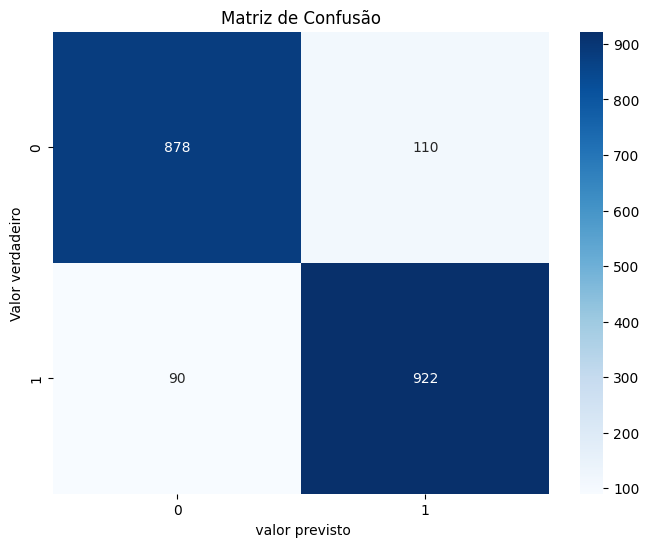

In [84]:
plotarMatriz(matrizNaiveBow,"Blues")

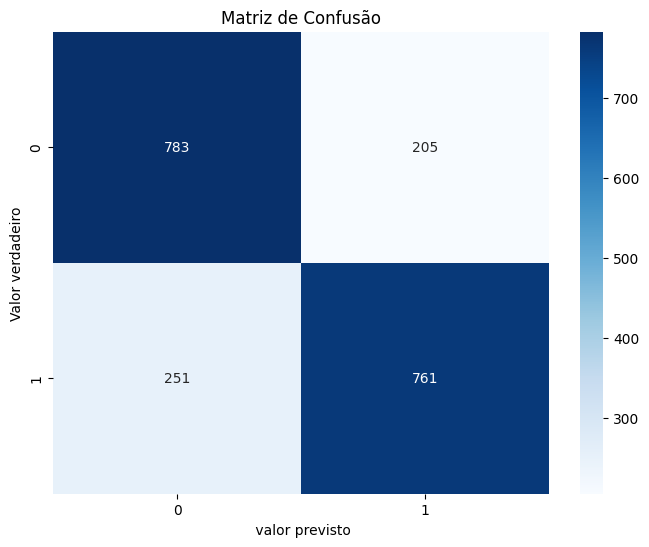

In [85]:
plotarMatriz(matrizNaiveTranformers,"Blues")

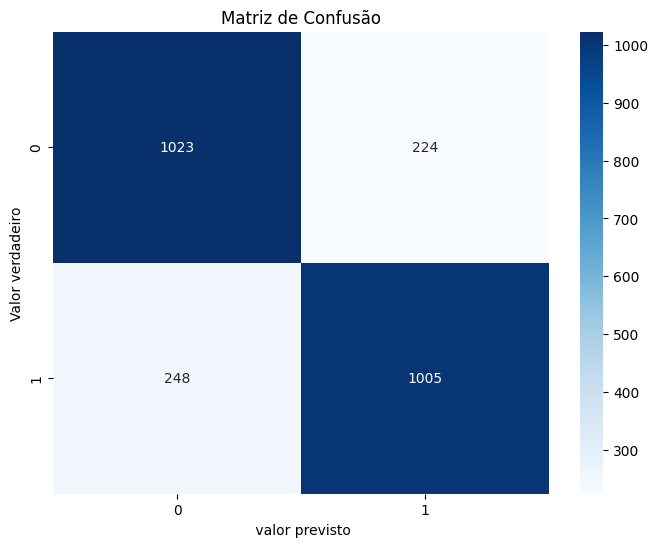

In [86]:
plotarMatriz(matrizTransformers,"Blues")

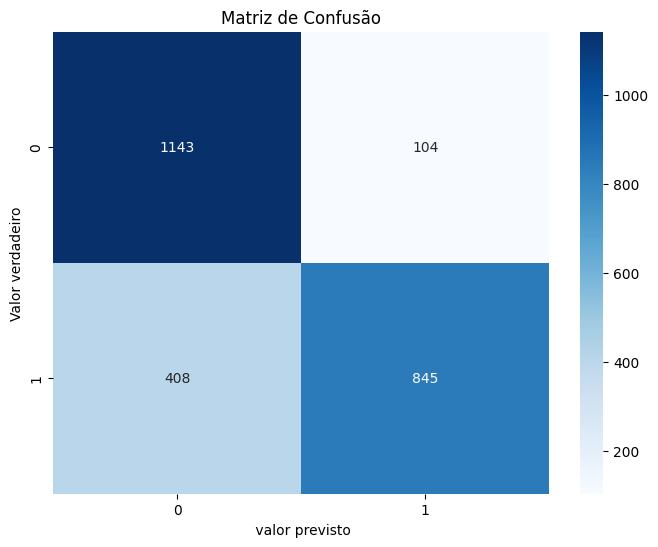

In [87]:
plotarMatriz(matrizBert,"Blues")